# Portfolio 3: Integrating a Light Dependent Resistor (LDR) on a Mobile Robot

> Integrate an external Light Dependent Resistor (LDR) sensor on a mobile robot, interface it, and collect data from it to detect a black line on the floor. Based on the insights gained from working with the sensor data, optimize the setup for more reliable and robust line detection.

Type:
- [ ] Extra Credit Activities
- [x] Portfolio (Group, but must to be included as a part of your own personal git)

Student information
  - Student name: Alexander Bom Kjærbo
  - Student mail: alkja24@student.sdu.dk
  - Student Git: @alkja24

*Group number:* 8

* Update the information of your group-members [here](https://docs.google.com/spreadsheets/d/1bPUntlpLZZRfmlYab-D-dvXX_tB_NG5Oh_vgMOeWHb4/edit?usp=sharing)

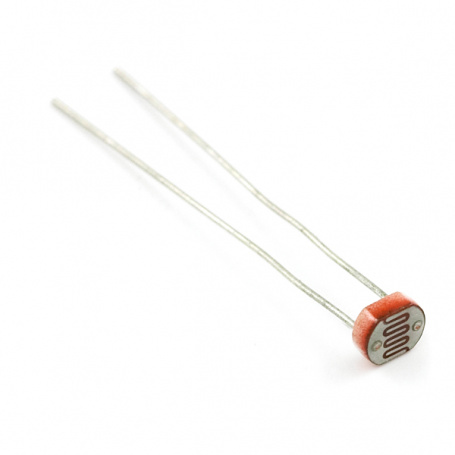

The objective of the portfolio is for you to:

1. Mount an LDR on your mobile robot so that it can be used to detect a black line on the floor (line detection).

2. Understand the response of an LDR when detecting a black line by collecting data systematically.

3. Optimize the detection of the black line by first making improvements, then collecting data using the same approach, and comparing the results.

4. Evaluate the insights gained and determine the best configuration and threshold for detecting black lines using an LDR.

# Assignment 1: Mount an LDR on your mobile robot

Mount the LDR underneath the robot, ensuring it faces downward.


Consider the following:

* **Hardware**: What hardware is needed?
  * This LDR (Light Dependent Resistor) is available for use in the assignment: https://www.sparkfun.com/products/9088?  
* **Position**:  Should it be in the front or the back of the robot?
* **Height**: What height should it be in to detect lines on the ground directly below it?
* **Angle**: What angle should the LDR be in? Pointing directly downward or?
* **Mounting**: Should the initial testing be on a breadboard or PCB Prototyping Board?

## 1.1: Hardware integration

Capture an image of your hardware hardware integration

***INSERT AN IMAGE OF THE MOUNTED LDR***

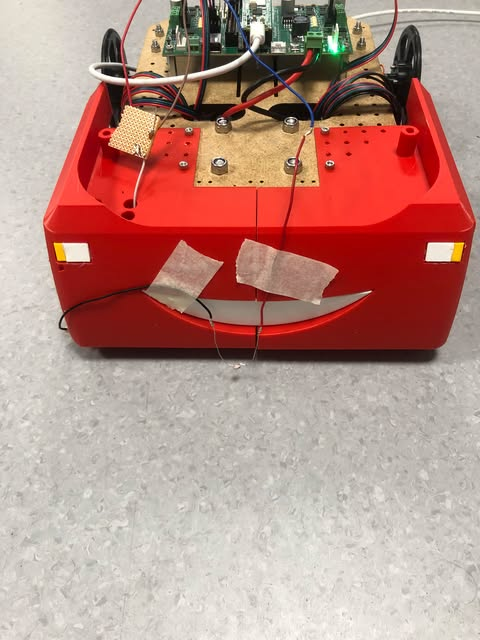

Draw the wiring diagram for your LDR integration

***INSERT AN ILLUSTRATION OF YOUR WIRING DIAGRAM FOR THE MOUNTED LDR***

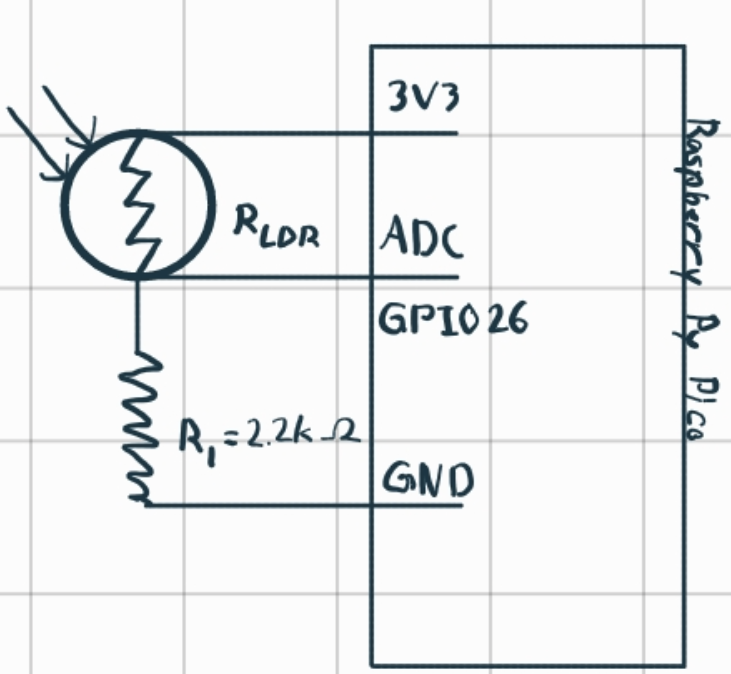

# Assignement 2: Data Collection (Baseline)

Program your mobile robot to turn from side-to-side, while collecting data from the LDR. Your robot must

1. Turn from 0 degrees to 180 degrees, with the black line positioned at 90 degrees
2. Wait for 2 seconds, thes
3. Turn back from 180 degrees to 0 degrees, before ending the data collection


## 2.1: Design the data collection

Consider the speed of the turn, what data need to collected, and your sampling freqency.

* Is the movement slow enough to allow for continuous data collection from the LDR?
* What data needs to be collected?
* How to make consistant/replicable? You will need to compare the baseline results with other data collections.
* What should the sampling rate be? And numeric precision?
* How should it be stored (locally?)?
* What format should it be stored in? .txt? .csv? or?
* Other important considerations?

List your key decision in bullets:

* Sample rate: 100 Hz to make it work with higher speeds
* Data format: csv files on the pico with (time, resistance, voltage measured on ADC)
* LDR as close to the ground as possible, while stil alowing light to reflect from the ground into the LDR
* Takes measurements using asyncio to ensure it always works 
* Slow rotation


## 2.2: Software integration

Develop and implemenet the software for the designed data collection.

In [ ]:
# This is a snippet of the code that reads the LDR sensor and writes the data to a CSV file.

async def monitorStart():
global shouldMonitor
with open("FinalTestWithoutShield1.csv", "w") as file: # w is for write, which overwrites the file if it already exists
    file.write("Time (s), Voltage (V), Resistance (Ohm)\n")
    current_time = 0

    while shouldMonitor:
        # Read raw ADC value (12-bit range: 0 to 4095)
        adc_value = adc_pin.read_u16()  # This returns 16-bit value (0-65535)
        
        # Scale the 16-bit reading to voltage
        voltage = (adc_value / 65535) * REFERENCE_VOLTAGE

        # Calculate the resistance of the LDR with the formula from the voltage divider circuit
        resistance = round(REFERENCE_VOLTAGE * R2 / voltage - R2)
        
        # Print the data to the file, where 2f means there are two decimal points
        file.write("{:.2f}, {:.2f}, {}\n".format(current_time, voltage, resistance))

        # Delay between readings, which enables the robot to drive in the mean time.
        await uasyncio.sleep(0.1)
        # This is for plotting the time in the csv file.
        current_time += 0.1

### 2.2.1: Define the behaviour for the Data collection

Illustrate the behaviour of your robot while performing the data collection (eg. using pseudocode or a flowchart):

***INSERT AN ILLUSTRATION OF YOUR DATA COLLECTION APPROACH***

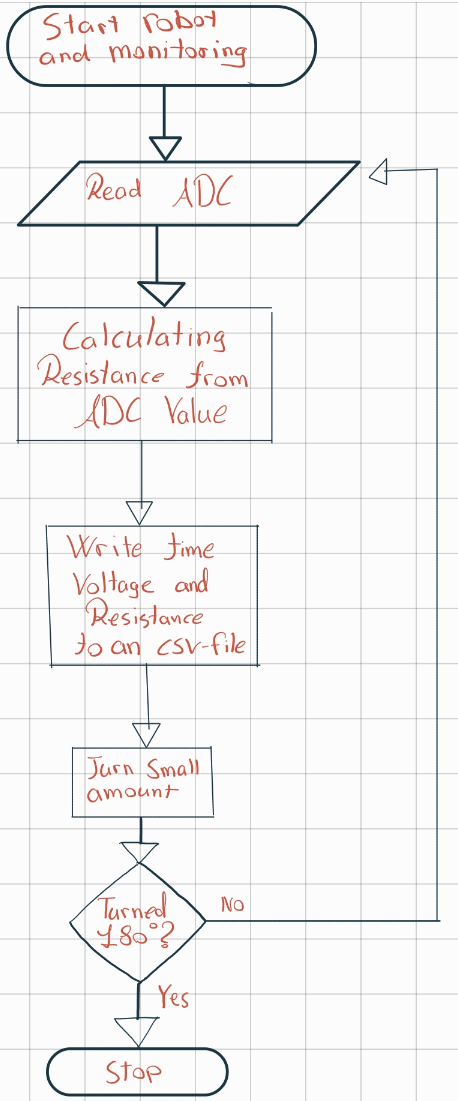

### 2.2.2: Validate the behaviour for the Data collection

Program your mobile robot according to your defined robot behaviour and data collection. Record the mobile robot while it performs a baseline data collection:

Video: https://youtu.be/tMvJ8TOj0D4

## 2.3: Vizualize the Baseline Data

Plot the collected LDR readings against a reference, eg. the rotation angles or time. Choose a visualization type that illustrates the LDR responds as it (potentially) encounters the black line.

Customize the plot such that it is self-explaining, eg. by:
* Adding a clear and descriptive title
* Adding legends or annotations
* Consider using fixed scales or ranges
* Consider using grids
* Highlighting important data points or ranges

Insert your source code for including and vizualizing the baseline data:

In [ ]:
import matplotlib.pyplot as plt
import csv


# Plot the data
plt.figure(figsize=(10, 5))

# Plot Voltage over Time
THRESHOLD = 1.2


path = "Dataplotting/"
fileNames = ["FinalTestWithoutShield1.csv"]
colors = ["blue", "orange", "green", "red", "purple"]

for i in range(len(fileNames)):
    # Lists to store the data in lists
    time_data = []
    voltage_data = []
    resistance_data = []


    # Read data from CSV file on the Pico
    with open(path+fileNames[i], "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            time_data.append(float(row[0]))        # Time in seconds
            voltage_data.append(float(row[1]))     # Voltage in volts
            resistance_data.append(int(row[2]))    # Resistance in ohms
            
            
    
    plt.subplot(2, 1, 1)
    plt.plot(time_data, voltage_data, label=fileNames[i], color=colors[i])

    # Plot Resistance over Time
    plt.subplot(2, 1, 2)
    plt.plot(time_data, resistance_data, label=fileNames[i], color=colors[i])       



plt.subplot(2, 1, 1)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage over Time")
plt.legend()
plt.grid()




plt.subplot(2, 1, 2)
#plt.plot([0,time_data[-1]], [THRESHOLD,THRESHOLD], linestyle="--", color="red", label="Threshold")'
plt.xlabel("Time (s)")
plt.ylabel("Resistance (ohm)")
plt.title("Resistance over Time")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


## 2.4: Analyze the Baseline Data

Based on the gained insight from plotting your baseline data, determine a threshold for detecting a black line using the LDR mounted on your mobile robot. Illustrate the baseline on your plot, eg. using a dashed line or a label.

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD***
We chose a threshold of 0,68 V


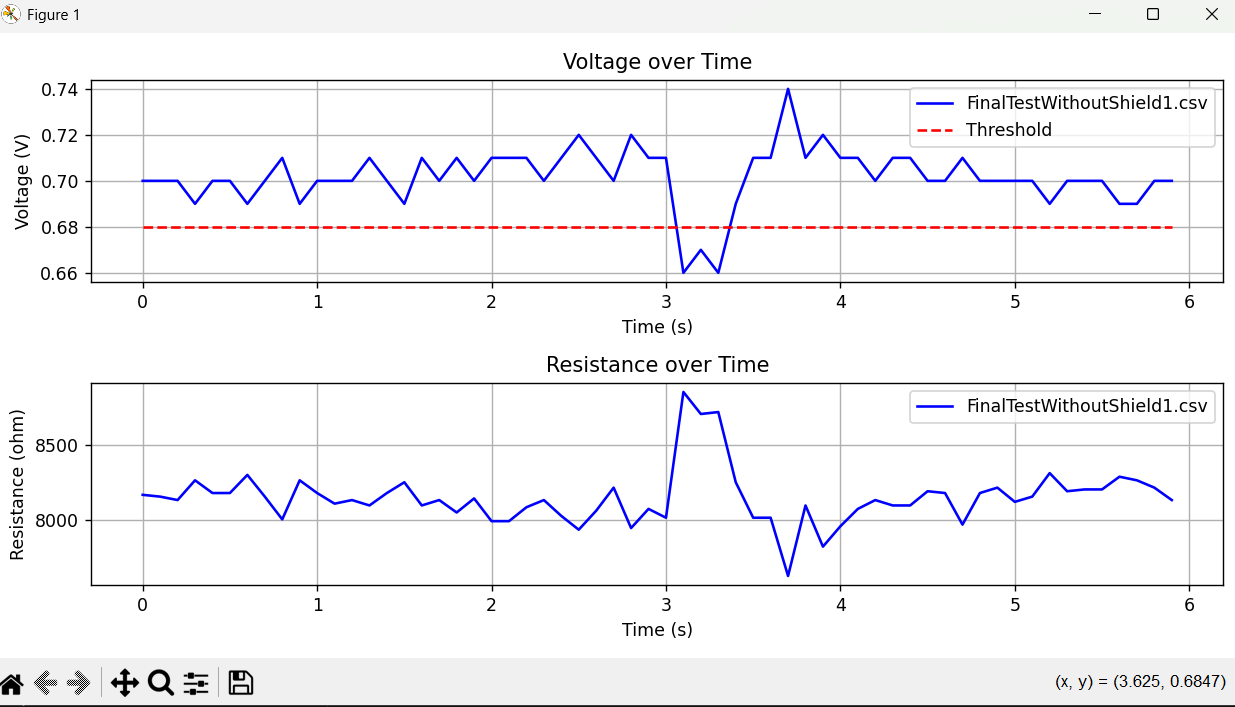

(Optional) Consider applying smoothing on the (raw) LDR data, eg. by applying a moving avarage to reduce the noise.

# Assignment 3: Optimize the LDR Response

Explore the following optimization methods to enhance the LDR's response.

For each method,

1. Capture an image of the setup for the given solution/approach for optimizing the LDR response
2. Collect data in the same manner as in Assignment 1
4. Compare the collected data with to your baseline, and determine a threshold.

After collecting and comparing the data, conclude if it has optimized the response or not, and what approach would be the most stable to use further on.

## Assignment 3.1: External light source

Adding an LED to illuminate the surface where the LDR is measuring can improve the its response by creating a controlled light source.

This approach reduces the impact of ambient light variations and increases contrast between the black line and the surrounding surface.

Consider the following:

* **Select an LED:** Choose an LED with sufficient brightness, preferably a white or infrared LED, as they provide a broad light spectrum that reflects well off most surfaces.

* **Position the LED:** Mount the LED near the LDR, angled to illuminate the area directly beneath the LDR. Ensure the light spreads evenly over the detection area. Remember to take into account that the LED doesn't light directly into the LDR, as the direct light from the LED could result in saturating the LDR response. So consider the angle of both the LED and LDR, and also if a sheilding between the two is needed.  

* **Power the LED:** Connect the LED to an appropriate power source, eg. a GPIO pin on the Raspberry Pi Pico with a current-limiting resistor to prevent damage. This also enables that you can control it (turning on/off) using software, and also consider if adjusting the brightness of the LED using PWM could help tuning the response.

(Optional) Consider if using multiple LEDs could improve the response even more, also if consider if the use of different LEDs in combination could be an option for improveming the response.

### Document the setup

Capture an image of your setup for improving the LDR response, and insert it below:

***INSERT THE IMAGE OF MOBILE ROBOT CLEARLY SHOWING YOUR IMPROVED SETUP***


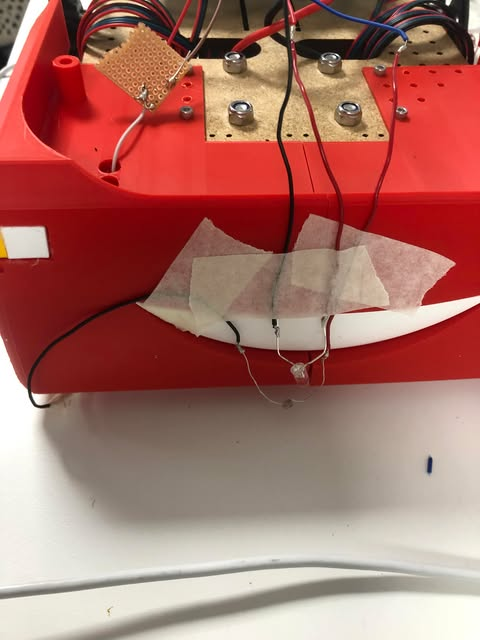

### Vizualize the data

Plot the collected LDR readings against the baseline data, and determine the threshold for detecting the black line. Insert the plot below:

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD***
We got a threshold of 0,75 V

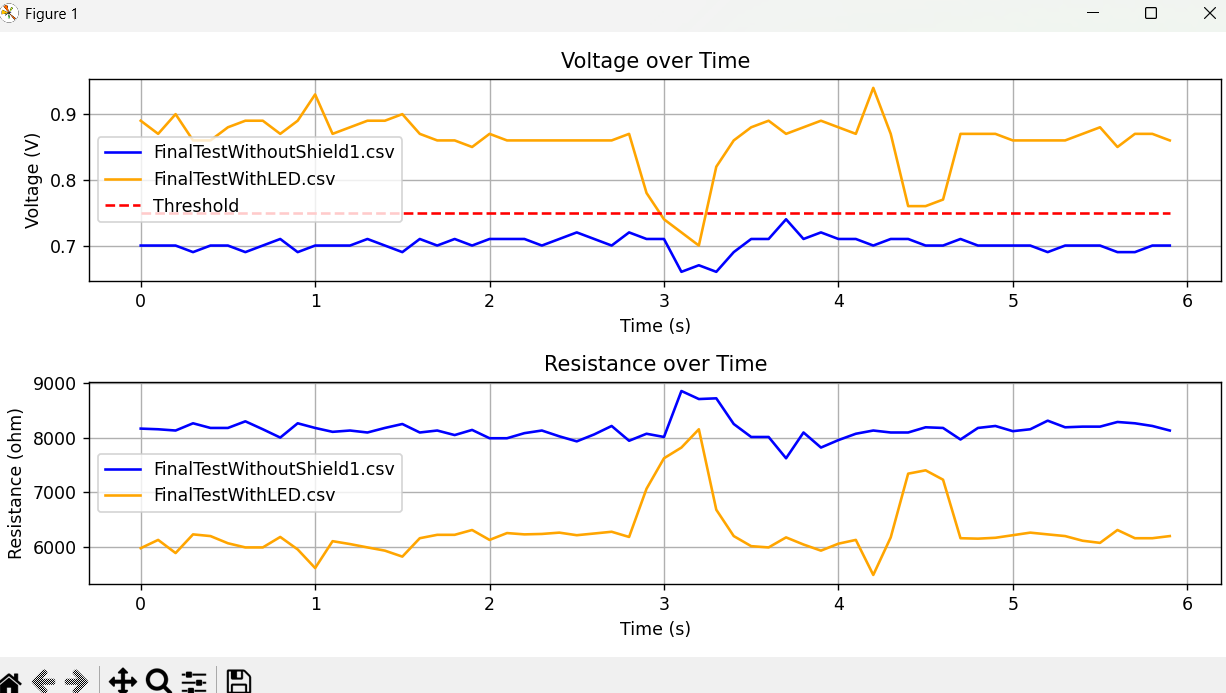

## Assignment 3.2: Shielding the LDR (with external light source)

Reducing the impact of ambient light is essential for ensuring that the LDR's response remains consistent and reliable, especially when using an LED as a controlled light source.

Shielding both the LED and the LDR can help minimize interference from external light sources and enhance the sensor's performance.

**Build a Shield Around the LDR and LED(s)** using materials like cardboard or plastic to form a small enclosure around both components using tape or glue. This enclosure should extend close to the surface without touching it, forming a focused detection area. In terms of choice of material(s) and design:
* Use materials that is not transparent / absorpes the ambient light
* Shoud have a minimal amount of gaps for the ambient light to be present, eg. by being as close as possible to the ground without affecting the movement of the mobile robot.
* A reflective surface around the LED can help direct more light downward (given that the LDR and LED is enclosed seperatly inside the enclouser)

(Optional) Consider **(1)** first making a working prototype/mock-up using simple materials (cardboard, plastic, tape, etc.), and **(2)** then make a 3D model of it for then 3D printing the desing for further testing.

### Document the setup

Capture an image of your setup for improving the LDR response, and insert it below:

***INSERT THE IMAGE OF MOBILE ROBOT CLEARLY SHOWING YOUR IMPROVED SETUP***

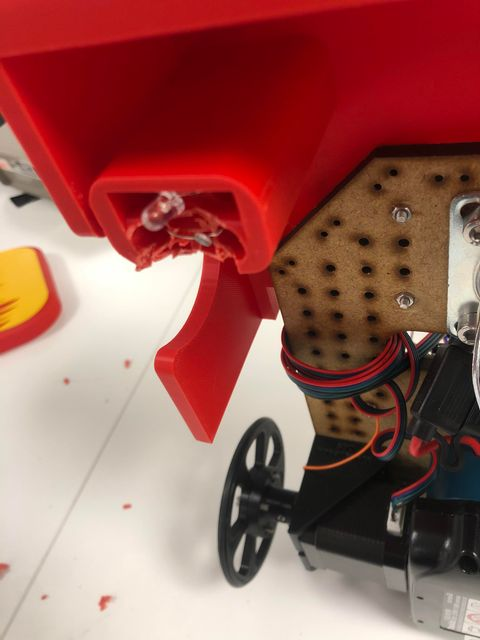

### Vizualize the data

Plot the collected LDR readings against the baseline data, and determine the threshold for detecting the black line. Insert the plot below:

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD***
Threshold at 0,75V


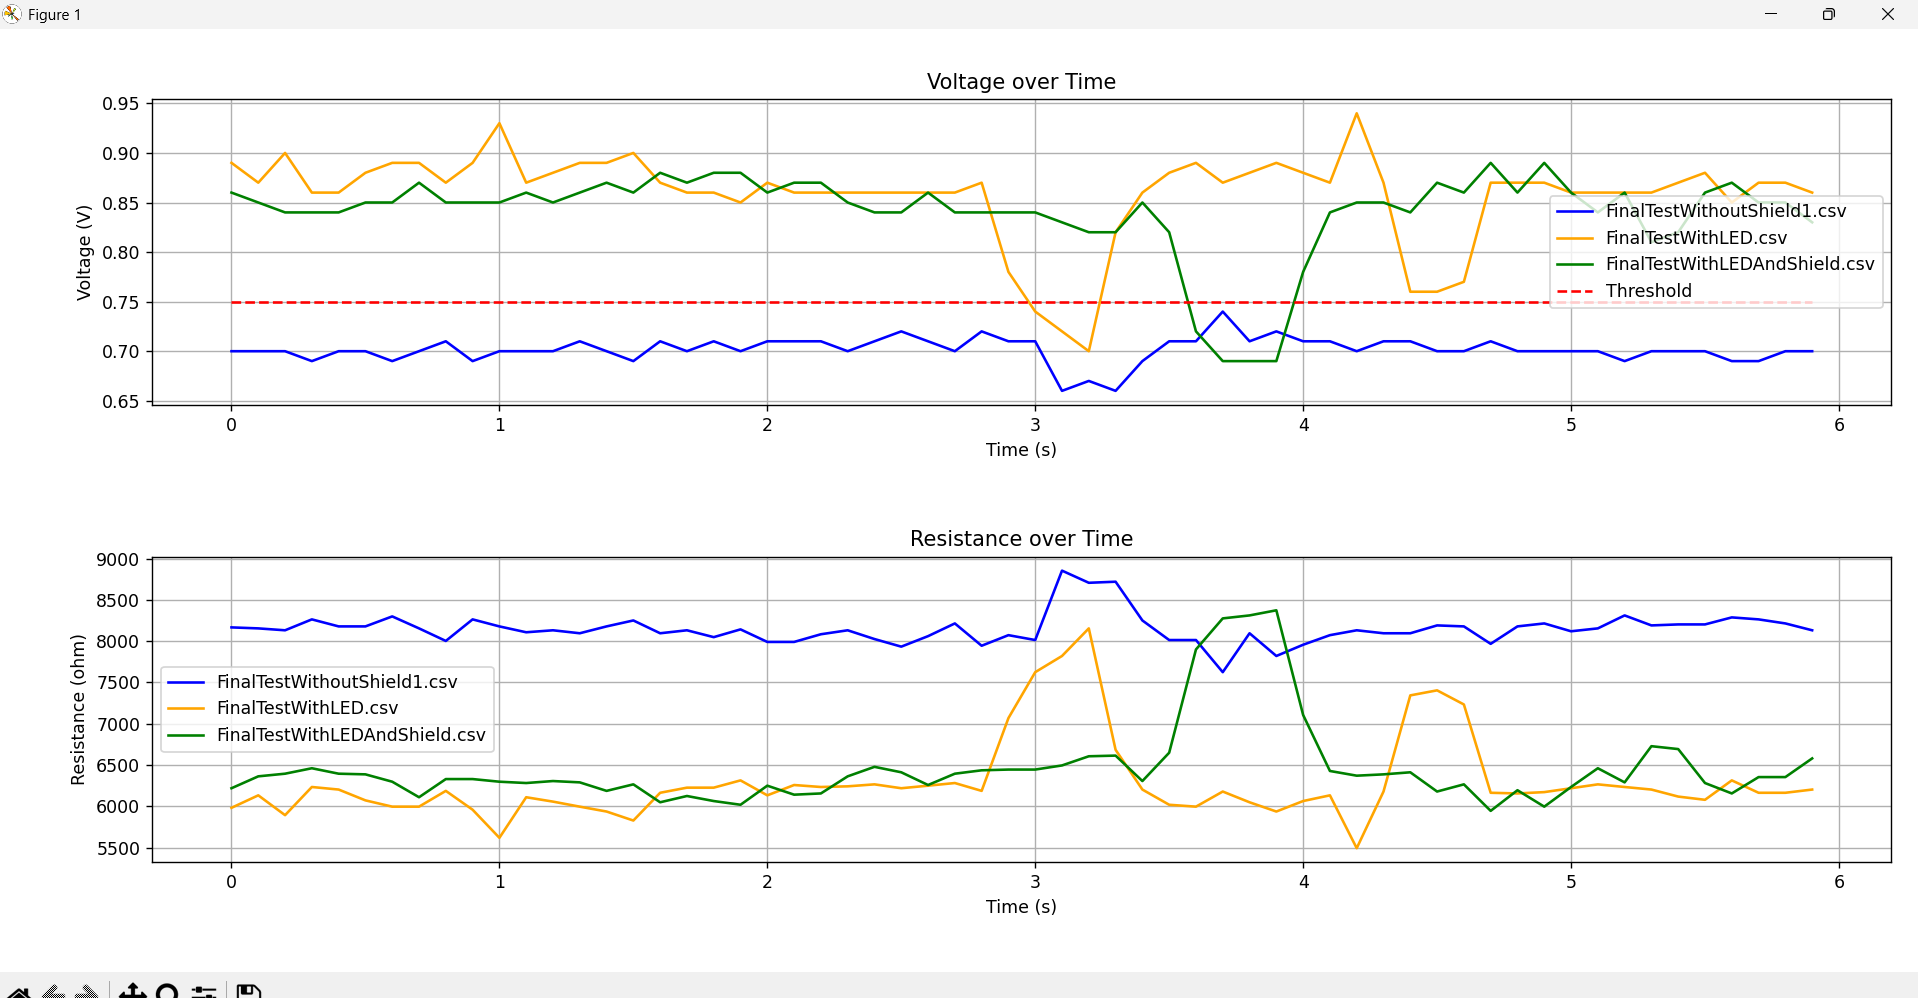

## Assignment 3.3: Shielding the LDR (with **no** external light source)

Same setup as Assignment 3.2, but with the external light source deactivated.

### Vizualize the data

Plot the collected LDR readings against the baseline data, and determine the threshold for detecting the black line. Insert the plot below:

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD***
did not change the threshold as the difference is very small between peaks and minimums

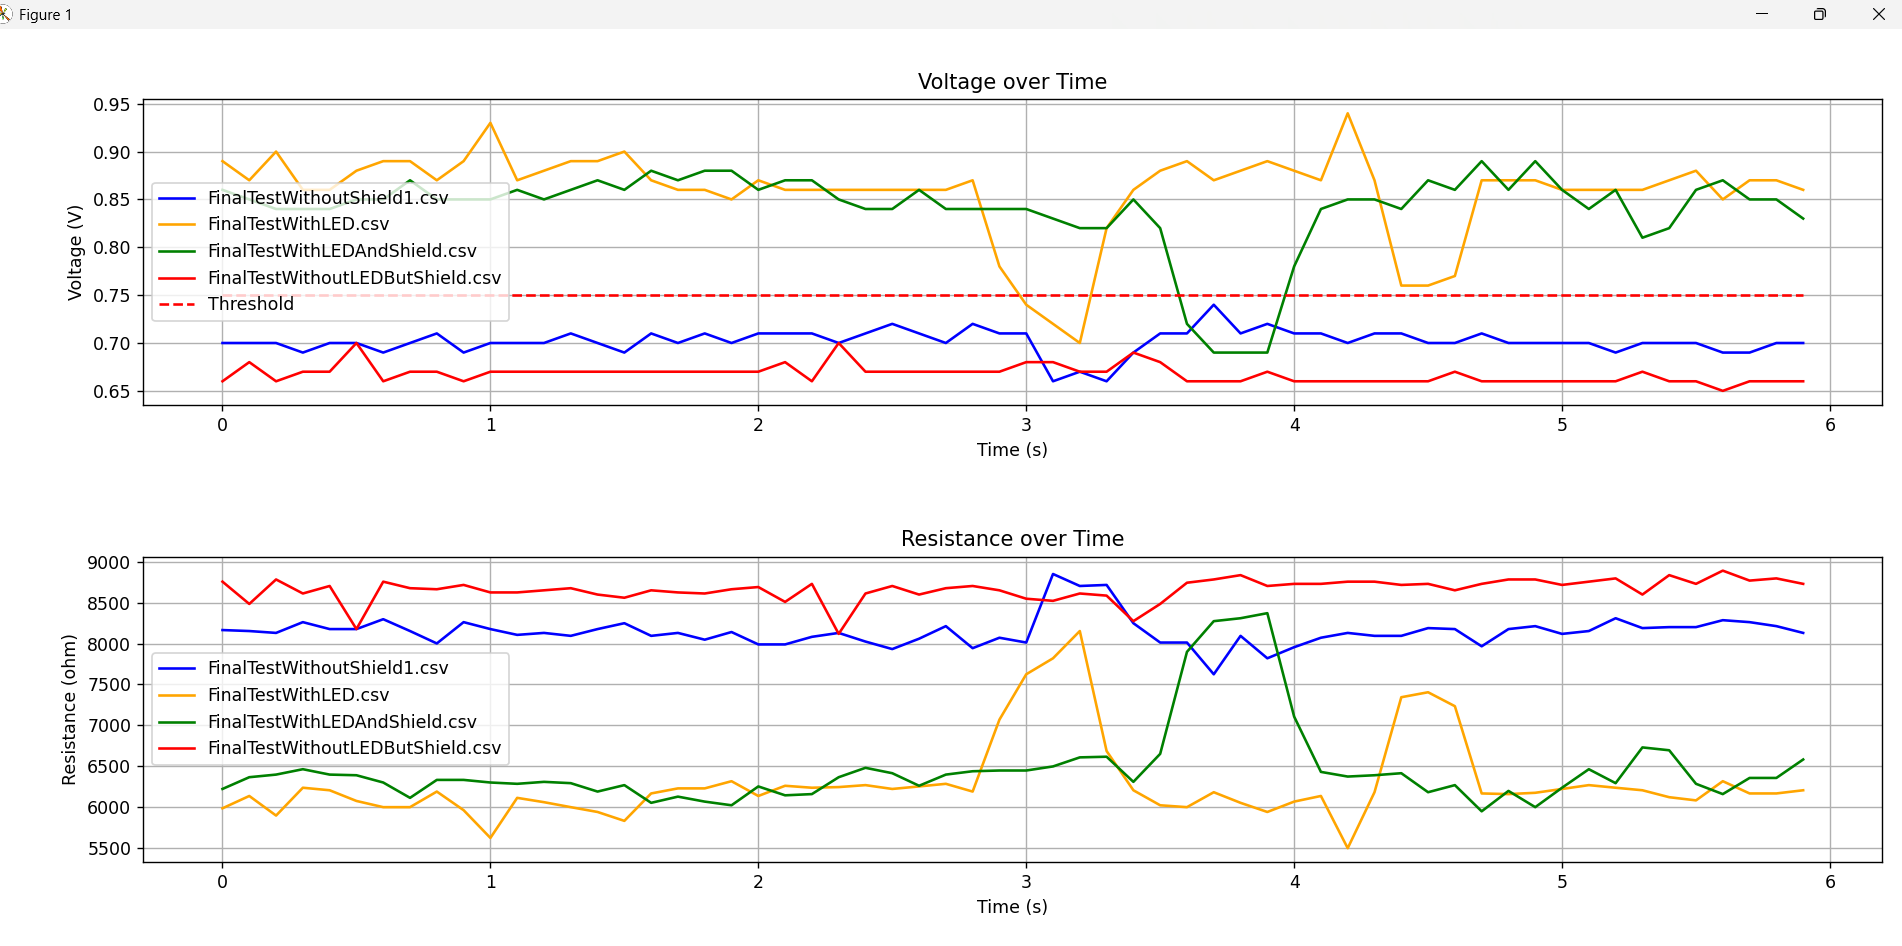

## Assignment 3.4: Evaluate one the results

Based on the results obtained from Assignments 3.1 to 3.3, write a few lines of plain text evaluating which approaches and optimizations have worked best, and outline your future plans for further improving the response.

We have improved the difference between peaks and minimums by adding an LED and further shield it from lights other than the LED. We want to further improve the shielding, especially the height which the LED and LDR is above the ground as the floor or mat might have bumbs

# Hand-in (Deadline: 17/11, 23:59)

## Illustrations and images

### 1.1: Hardware integration

***INSERT AN IMAGE OF THE MOUNTED LDR***

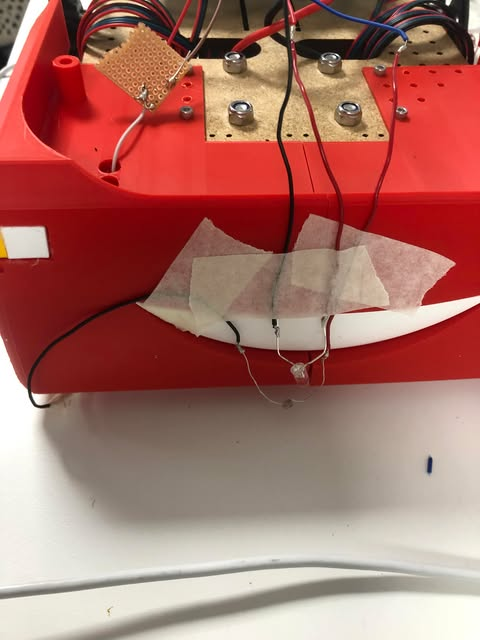

***INSERT AN ILLUSTRATION OF YOUR WIRING DIAGRAM FOR THE MOUNTED LDR***

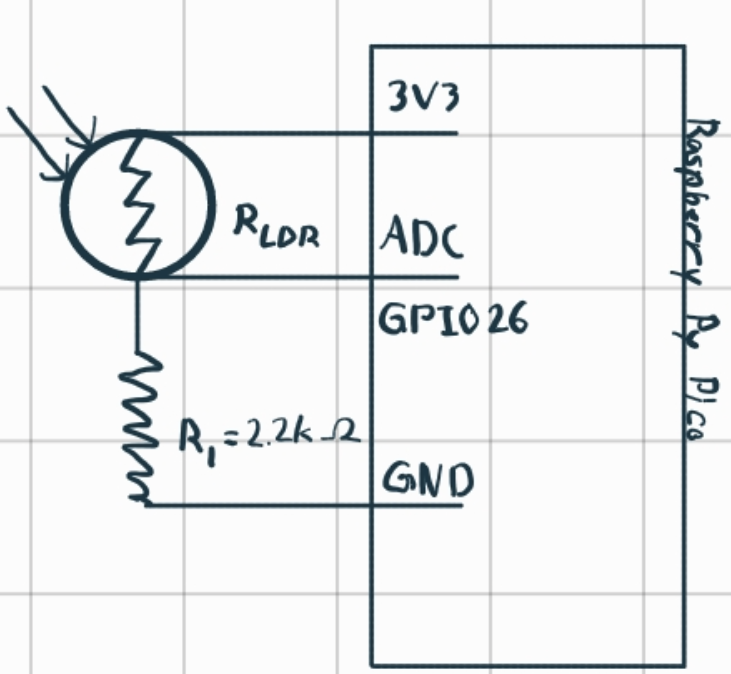

# R1 = 2,2 kohm

### 2.2.1: Define the behaviour for the Data collection

***INSERT AN ILLUSTRATION OF YOUR DATA COLLECTION APPROACH***

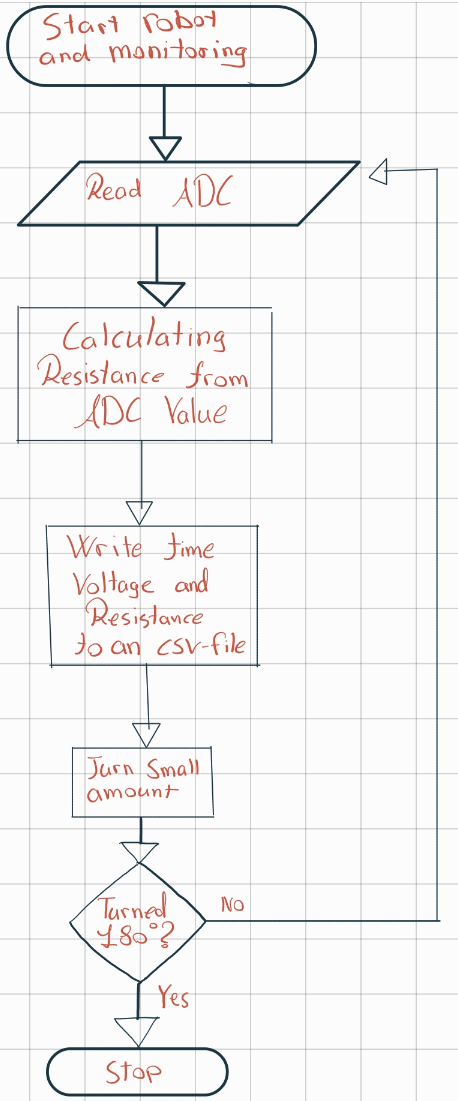

### Assignment 3.1: External light source

Document the setup

***INSERT THE IMAGE OF MOBILE ROBOT CLEARLY SHOWING YOUR IMPROVED SETUP***

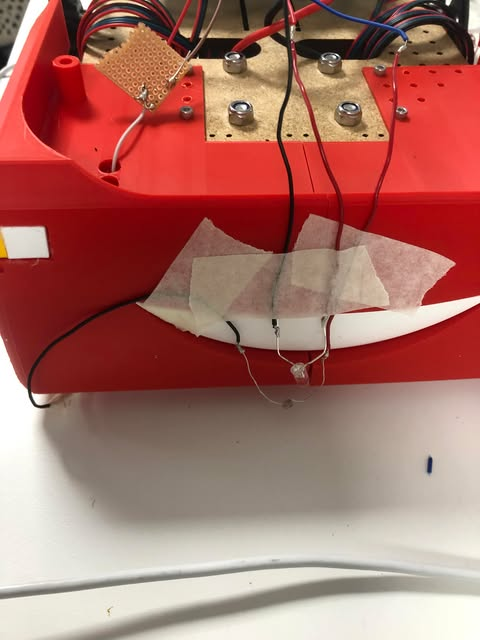

Vizualize the data

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD***

We got a threshold of 0,75 V

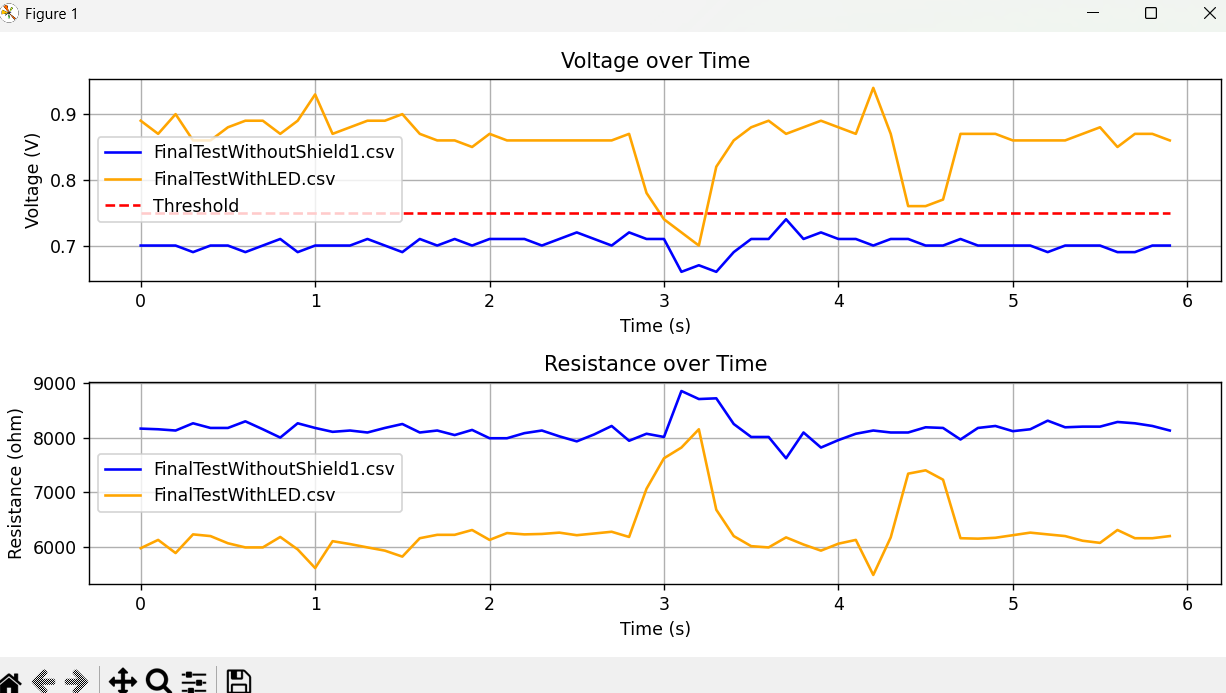

### Assignment 3.2: Shielding the LDR (with external light source)

Document the setup

***INSERT THE IMAGE OF MOBILE ROBOT CLEARLY SHOWING YOUR IMPROVED SETUP***


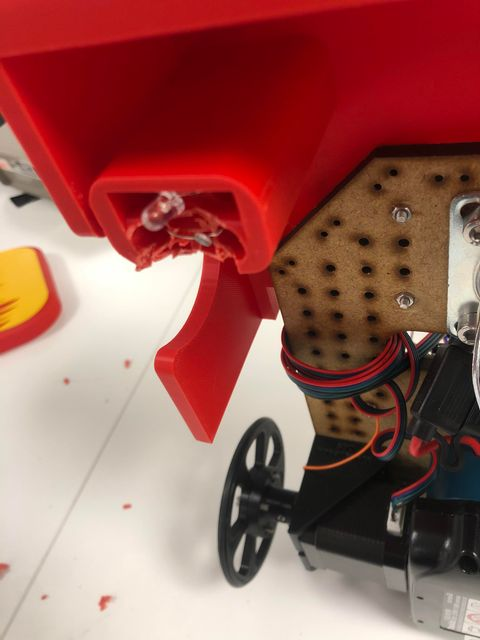

Vizualize the data

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD*** 
>Threshold of 0,75 V

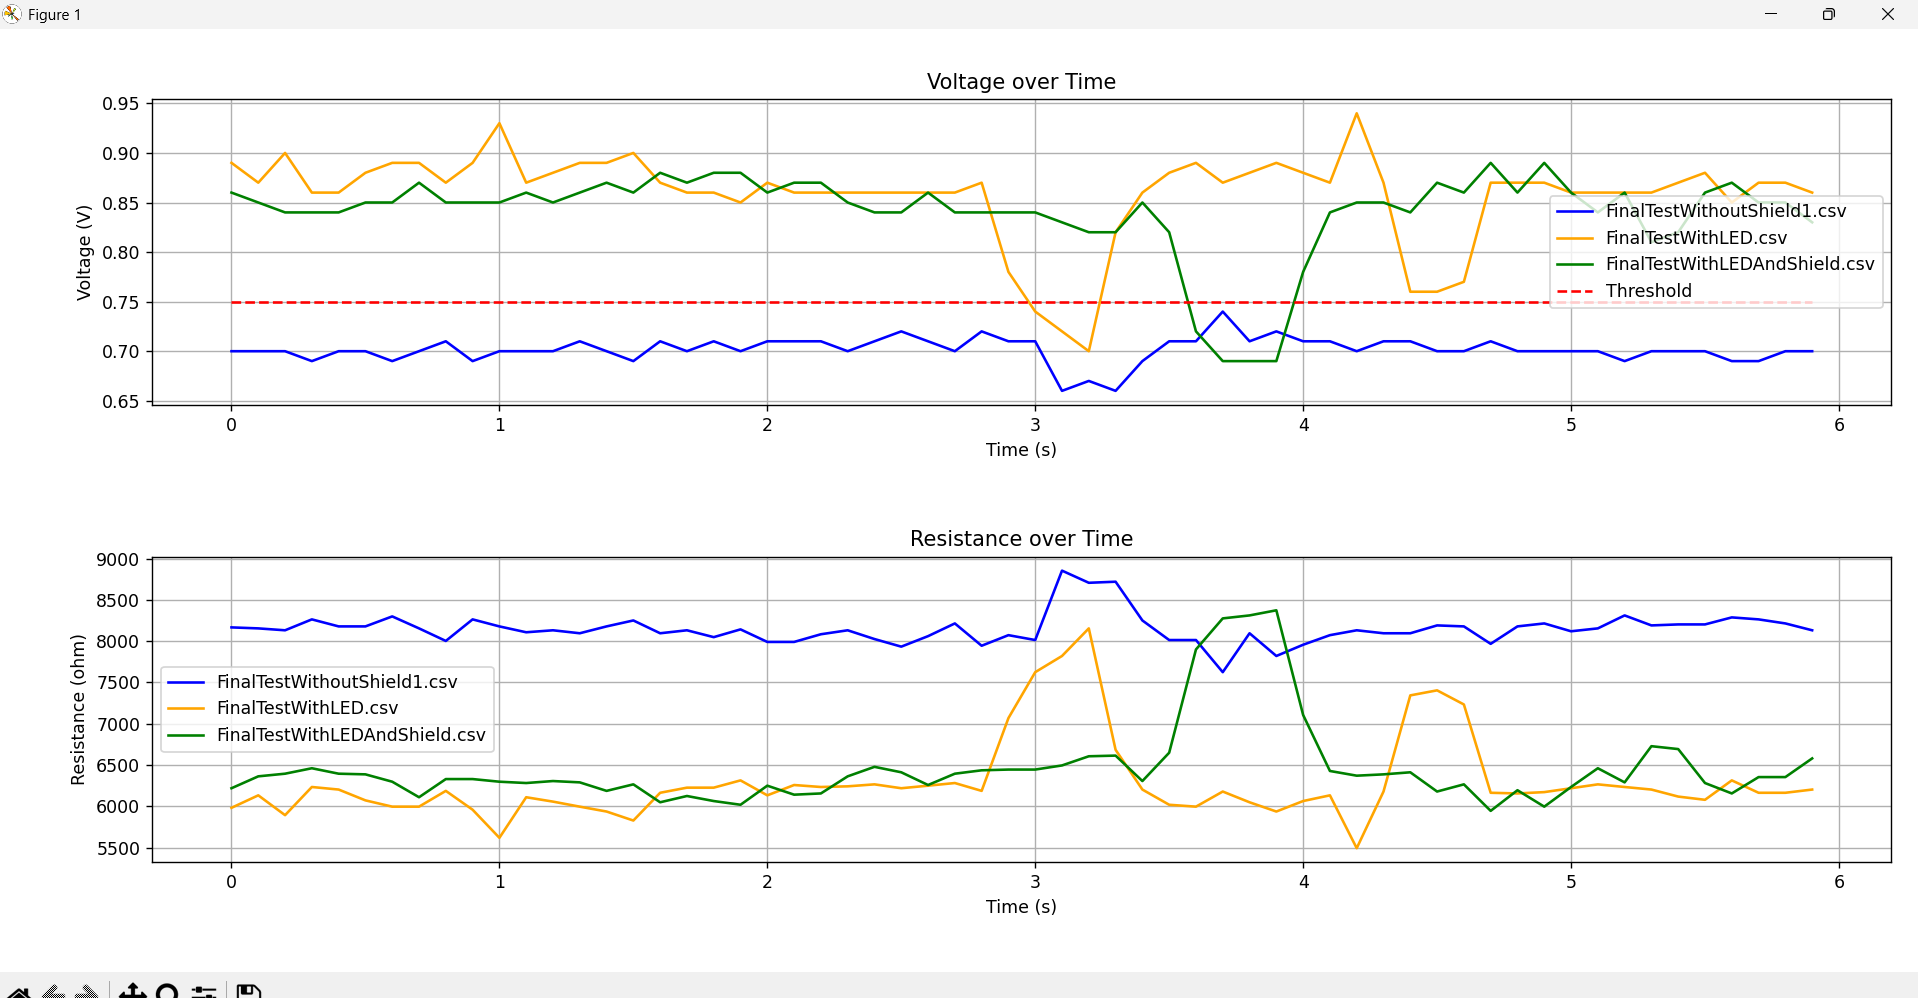

### Assignment 3.3: Shielding the LDR (with **no** external light source)

Vizualize the data

***INSERT YOUR PLOT OF THE BASELINE DATA AND WITH THE MARKED THRESHOLD***
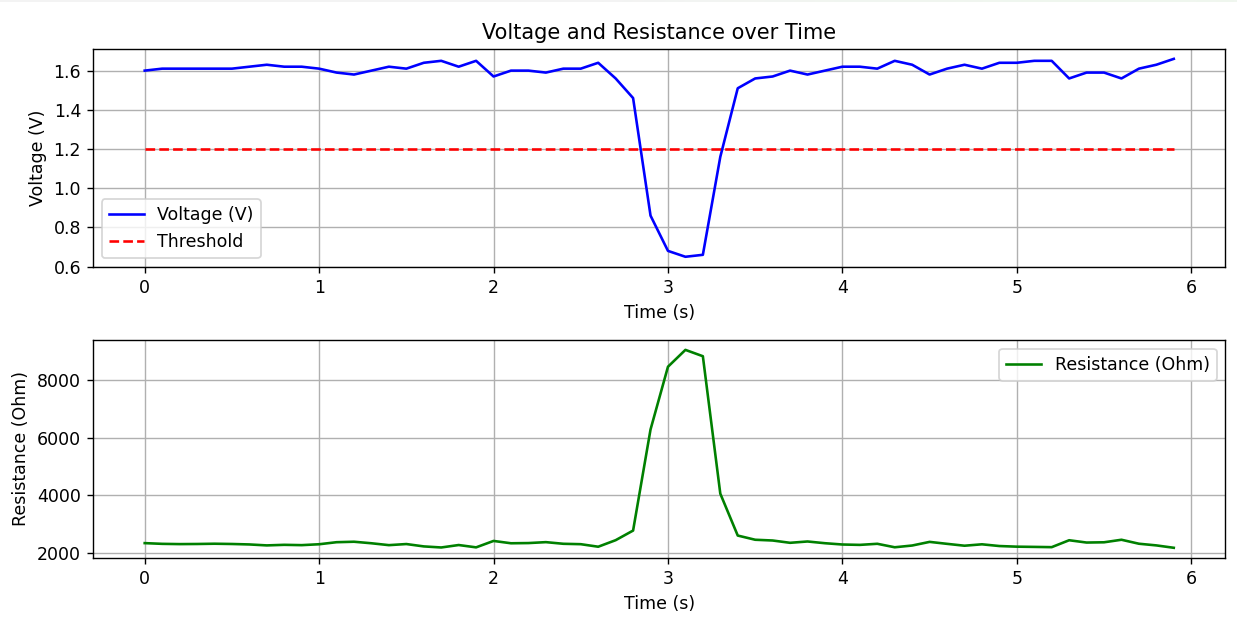

## Video

### 2.2.2: Validate the behaviour for the Data collection

Video: https://youtu.be/tMvJ8TOj0D4

## Source code

Link to source code on Git: https://gitlab.sdu.dk/alkja24/Programmering-af-mobile-robotter-filer/-/tree/main/Portfolie3?ref_type=heads
* Even though you are working as a group, you will need to include the source code in your own personal portfolio.

*Group number:* 8
* Update the information of your group-members [here](https://docs.google.com/spreadsheets/d/1bPUntlpLZZRfmlYab-D-dvXX_tB_NG5Oh_vgMOeWHb4/edit?usp=sharing)

2.3: Vizualize the Baseline Data

In [ ]:
# INSERT YOUR SOURCE CODE FOR GENERATING THE PLOT FOR THE BASELINE DATA

import matplotlib.pyplot as plt
import csv

# Lists to store the data in lists
time_data = []
voltage_data = []
resistance_data = []

# Read data from CSV file on the Pico
with open("Dataplotting/data_log9.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        time_data.append(float(row[0]))        # Time in seconds
        voltage_data.append(float(row[1]))     # Voltage in volts
        resistance_data.append(int(row[2]))    # Resistance in ohms

# Plot the data
plt.figure(figsize=(10, 5))

# Plot Voltage over Time
plt.subplot(2, 1, 1)
plt.plot(time_data, voltage_data, label="Voltage (V)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage and Resistance over Time")
plt.legend()
plt.grid()

# Plot Resistance over Time
plt.subplot(2, 1, 2)
plt.plot(time_data, resistance_data, label="Resistance (Ohm)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Resistance (Ohm)")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()